In [65]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
os.chdir("E:/Internship/data/")

In [3]:
movies = pd.read_csv('./movies_cleaned_v3.csv')

In [50]:
ELIGIBLE_CRITERIA = ['R','G','PG','PG-13','TV-13','Not Rated','TV-14','NC-17','TV-PG']

In [6]:
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,release_year,new title,overview_cleaned,critically_acclaimed,age_rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,N/R,Toy Story,False,7.7,5415.0,1995,Toy Story (1995),"led woody, andi toy live happili room andi bir...",2353.324641,G
1,False,N/R,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",N/R,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Jumanji (1995),sibl judi peter discov enchant board game open...,778.136085,PG
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",N/R,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,Grumpier Old Men (1995),famili wed reignit ancient feud next-door neig...,26.278206,PG-13
3,False,N/R,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",N/R,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,Waiting to Exhale (1995),"cheat on, mistreat step on, women hold breath,...",8.715714,R
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",N/R,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,Father of the Bride Part II (1995),"georg bank recov daughter wedding, receiv news...",40.223204,PG


In [157]:
# clea = {:'Not Rated'}
clea = ['1996','1995–','Unrated','Not Rated (USA)','Approved']
movies['age_rating'] = movies['age_rating'].map(lambda x: str(x).strip())
movies['age_rating'] = movies['age_rating'].map(lambda x: 'Not Rated' if x in clea else x)

In [158]:
movies.to_csv('./movies_cleaned_v5.csv',index=False)

In [55]:
movies[movies['age_rating'].isin(['1995-'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,release_year,new title,overview_cleaned,critically_acclaimed,age_rating


In [56]:
movies[~movies['age_rating'].isin(ELIGIBLE_CRITERIA)]['age_rating'].values

array([], dtype=object)

In [60]:
pd.pivot_table(movies, values = ['critically_acclaimed','budget'],index='age_rating',aggfunc=['sum','mean','count','max'])

sum                               mean  \
                 budget critically_acclaimed        budget   
age_rating                                                   
G            7710058365         79591.899889  5.840953e+06   
NC-17         178407001          4104.814176  2.258316e+06   
Not Rated    9866626037        322049.565560  3.775832e+05   
PG          35322632567        239186.753452  9.795517e+06   
PG-13       77713487286        547554.224691  2.052112e+07   
R           61060848972        638121.511030  6.106085e+06   
TV-13                 0            28.988635  0.000000e+00   
TV-14         113466317          1947.953931  3.782211e+05   
TV-PG          95400032          3546.801849  5.101606e+05   

                                 count                             max  \
           critically_acclaimed budget critically_acclaimed     budget   
age_rating                                                               
G                     60.296894   1320                 1320  200000000   
NC-17                 51.959673     79                   79   45000000   
Not Rated             12.324426  26131                26131  150000000   
PG                    66.330214   3606                 3606  260000000   
PG-13                144.587860   3787                 3787  380000000   
R                     63.812151  10000                10000  250000000   
TV-13                 14.494318      2                    2          0   
TV-14                  6.493180    300                  300   40000000   
TV-PG                 18.966855    187                  187   36500000   

                                 
           critically_acclaimed  
age_rating                       
G                   2925.488414  
NC-17               1000.000000  
Not Rated           3000.000000  
PG                  3565.491846  
PG-13               7403.997896  
R                   5689.594356  
TV-13                 14.994233  
TV-14                317.367763  
TV-PG               1000.000000

In [104]:
criticall_acclaimed = movies.groupby('age_rating', as_index=False)['critically_acclaimed'].max()

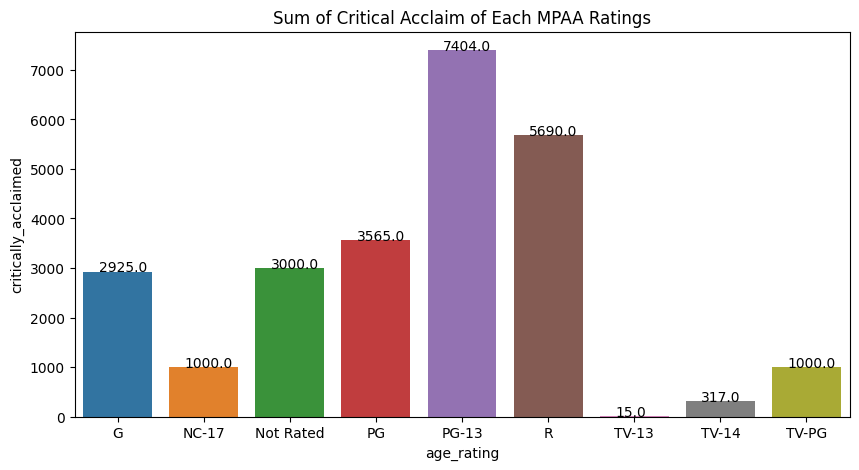

In [105]:
plt.figure(figsize=(10,5))

ax = sns.barplot(criticall_acclaimed, x = 'age_rating', y= 'critically_acclaimed', hue='age_rating')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height(),0)),(bar.get_x() + bar.get_width()*0.225,bar.get_height()+1.25))

plt.title("Sum of Critical Acclaim of Each MPAA Ratings")

plt.show()

In [106]:
criticall_acclaimed = movies.groupby('age_rating', as_index=False)['critically_acclaimed'].sum()

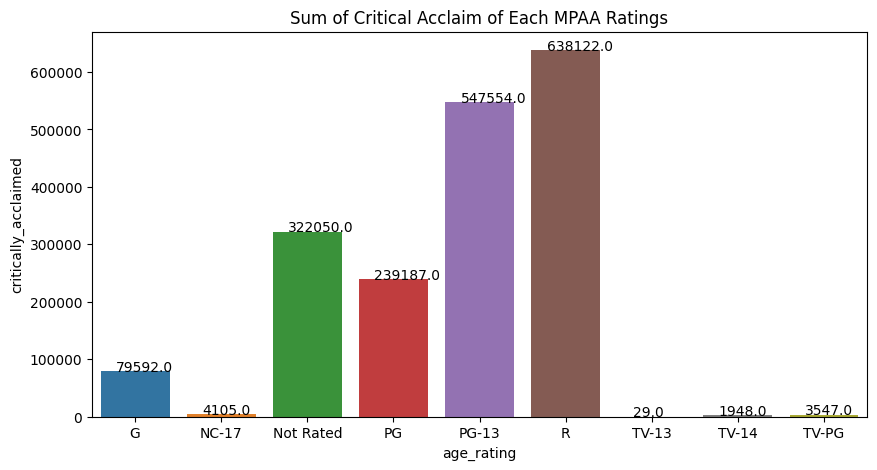

In [107]:
plt.figure(figsize=(10,5))

ax = sns.barplot(criticall_acclaimed, x = 'age_rating', y= 'critically_acclaimed', hue='age_rating')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height(),0)),(bar.get_x() + bar.get_width()*0.225,bar.get_height()+2.25))

plt.title("Sum of Critical Acclaim of Each MPAA Ratings")

plt.show()

In [108]:
criticall_acclaimed = movies.groupby('age_rating', as_index=False)['critically_acclaimed'].count()

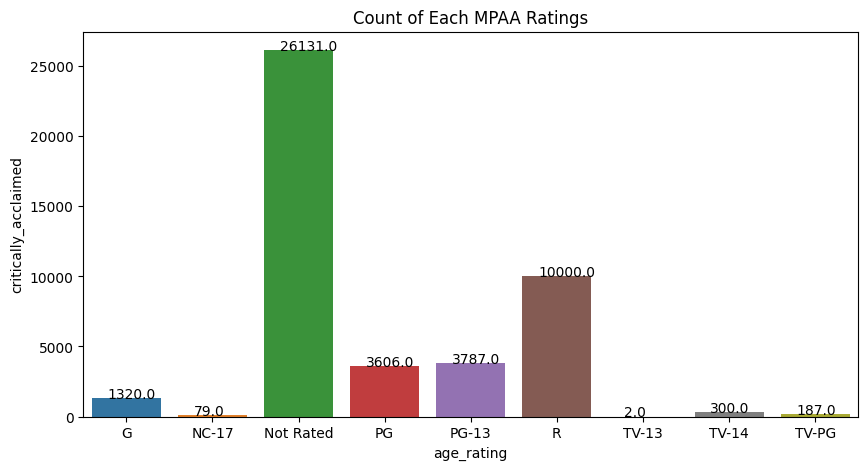

In [109]:
plt.figure(figsize=(10,5))

ax = sns.barplot(criticall_acclaimed, x = 'age_rating', y= 'critically_acclaimed', hue='age_rating')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height(),0)),(bar.get_x() + bar.get_width()*0.225,bar.get_height()-1.25))

plt.title("Count of Each MPAA Ratings")
plt.show()

In [110]:
pd.options.display.max_columns = None

In [111]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,new title,overview_cleaned,critically_acclaimed,age_rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,N/R,Toy Story,False,7.7,5415.0,1995,Toy Story (1995),"led woody, andi toy live happili room andi bir...",2353.324641,G
1,False,N/R,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",N/R,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Jumanji (1995),sibl judi peter discov enchant board game open...,778.136085,PG
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",N/R,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,Grumpier Old Men (1995),famili wed reignit ancient feud next-door neig...,26.278206,PG-13
3,False,N/R,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",N/R,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,Waiting to Exhale (1995),"cheat on, mistreat step on, women hold breath,...",8.715714,R
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",N/R,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,Father of the Bride Part II (1995),"georg bank recov daughter wedding, receiv news...",40.223204,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45407,False,N/R,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2017-06-14,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,2017,Subdue (2017),rise fall man woman.,0.166639,Not Rated
45408,False,N/R,0,"[{'id': 18, 'name': 'Drama'}]",N/R,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx

In [113]:
utitlty = pd.read_csv('./genre_utility_matrix_with_movies.csv')

In [126]:
utitlty[utitlty['id'].isin(movies['id'])]

,id,Music,Animation,Western,Adventure,Horror,Drama,Mystery,Foreign,Documentary,Comedy,War,Science Fiction,Romance,Thriller,History,TV Movie,Fantasy,Family,Crime,Action
0,862,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,8844,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,15602,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,31357,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,11862,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45424,439050,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45425,111109,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45426,67758,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45427,227506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
utitlty['id'].isin(movies['id'].unique()).sum()

45429

In [131]:
utitlty[utitlty.duplicated()]

,id,Music,Animation,Western,Adventure,Horror,Drama,Mystery,Foreign,Documentary,Comedy,War,Science Fiction,Romance,Thriller,History,TV Movie,Fantasy,Family,Crime,Action
1465,105045,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9165,5511,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9327,23305,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
12066,14788,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
13375,141971,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
15074,22649,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
15765,13209,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
16764,141971,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
20835,77221,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20891,109962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
utitlty.drop_duplicates(inplace=True)

In [133]:
utitlty.to_csv("genre_utility_matrix_with_movies.csv", index=False)

In [149]:
utitlty.columns

Index(['id', 'Music', 'Animation', 'Western', 'Adventure', 'Horror', 'Drama',
       'Mystery', 'Foreign', 'Documentary', 'Comedy', 'War', 'Science Fiction',
       'Romance', 'Thriller', 'History', 'TV Movie', 'Fantasy', 'Family',
       'Crime', 'Action'],
      dtype='object')

In [138]:
melted_utility = utitlty.melt(id_vars='id',var_name="genre")

In [141]:
final_melt = melted_utility[melted_utility['value']==1]

In [144]:
final_melt[final_melt['id'] == 862]

,id,genre,value
45399,862,Animation,1
408591,862,Comedy,1
771783,862,Family,1


In [152]:
final_melt.drop('value',axis=1, inplace=True)

C:\Users\mahat\AppData\Local\Temp\ipykernel_9440\1940905188.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
final_melt.to_csv("melted_genres.csv",index=False)